In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings




In [2]:
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('C:/Users/Dell/Downloads/train1.csv')

In [4]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4959,FDF09,6.215,Low Fat,0.012168,Fruits and Vegetables,37.4848,OUT049,1999,Medium,Tier 1,Supermarket Type1,111.8544
2185,FDL24,10.300,Regular,0.024876,Baking Goods,173.0422,OUT013,1987,High,Tier 3,Supermarket Type1,2069.3064
3432,FDC60,5.425,Regular,0.191603,Baking Goods,87.0514,OUT010,1998,NaN,Tier 3,Grocery Store,88.5514
6797,FDA25,16.500,Regular,0.068264,Canned,104.7990,OUT045,2002,NaN,Tier 2,Supermarket Type1,1238.3880
6629,FDT39,6.260,Regular,0.009888,Meat,150.7366,OUT045,2002,NaN,Tier 2,Supermarket Type1,2418.1856


In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
per=data.isnull().sum()*100/len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [9]:
data.duplicated().any()

False

In [10]:
mean_weight=data['Item_Weight'].mean()
median_weight=data['Item_Weight'].mean()

In [11]:
print(mean_weight,median_weight)

12.857645184135976 12.857645184135976


In [12]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [13]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [14]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.860121735060453


In [15]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

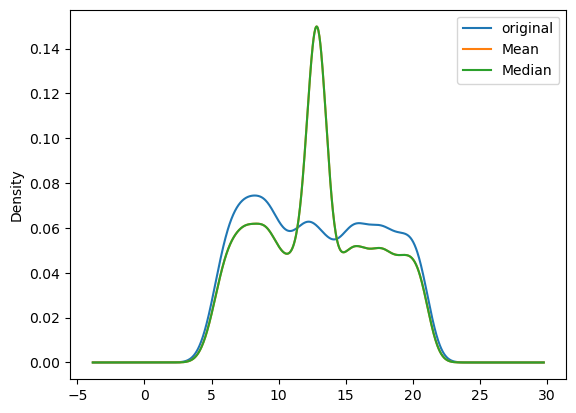

In [16]:
data['Item_Weight'].plot(kind = "kde",label = "original")
data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")
data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()


<Axes: >

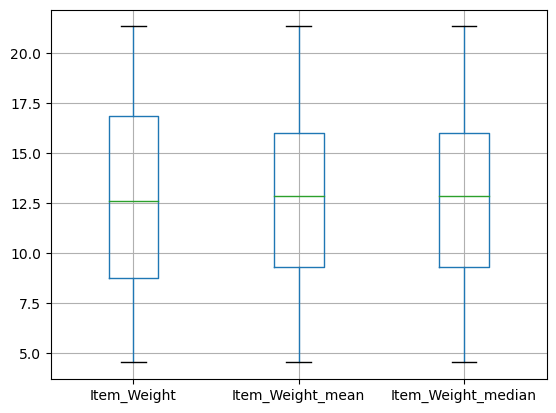

In [17]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [18]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")


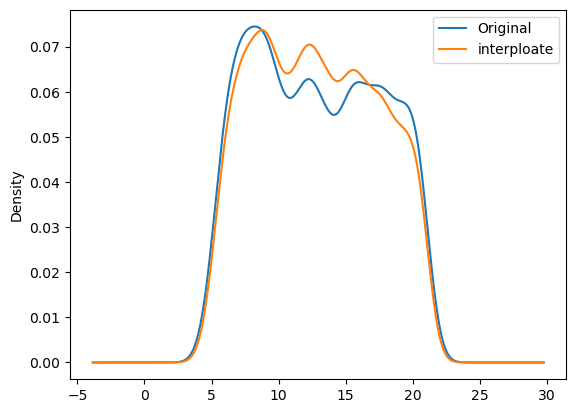

In [19]:
data['Item_Weight'].plot(kind = "kde", label = "Original")

data['Item_Weight_interploate'].plot(kind = "kde", label = "interploate")

plt.legend()
plt.show()

In [20]:
from sklearn.impute import KNNImputer

In [21]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [22]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()


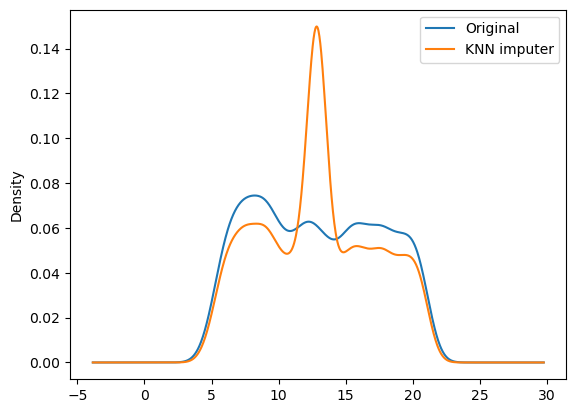

In [23]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [24]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)



In [25]:
data.head(1)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [26]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [27]:
data['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [28]:
data['Outlet_Type'].value_counts()


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [29]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))


In [30]:
mode_outlet


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [31]:
missing_values = data['Outlet_Size'].isnull()

In [32]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [33]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])


In [34]:
data.isnull().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [35]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [36]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [37]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)


In [38]:
data['Item_Fat_Content'].value_counts()


Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [39]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [40]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [41]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')


In [42]:
data.head(1)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [43]:
data['Item_Visibility_interpolate'].value_counts()


Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

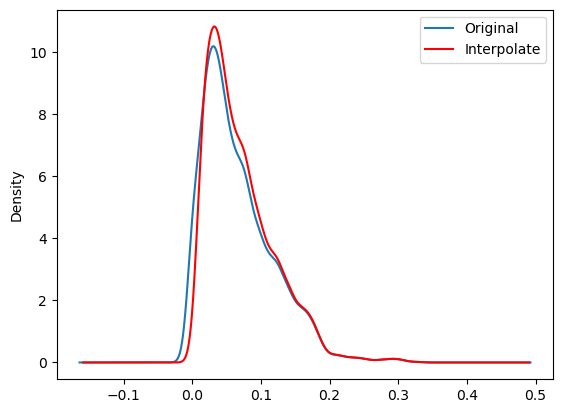

In [44]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()


In [45]:
data = data.drop('Item_Visibility',axis=1)

In [46]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [47]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [48]:
data['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [49]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [50]:
data['Item_Identifier'].value_counts().sample(5)


Item_Identifier
DRF25    7
NCY30    4
FDR25    5
FDR07    4
DRZ24    5
Name: count, dtype: int64

In [51]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])


In [52]:
data['Item_Identifier'].value_counts()


Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [53]:
data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [54]:
data['Outlet_Establishment_Year']


0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [55]:
import datetime as dt


In [56]:
current_year = dt.datetime.today().year


In [57]:
current_year


2024

In [58]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']


In [59]:
data.head(1)


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [60]:
data = data.drop('Outlet_Establishment_Year',axis=1)


In [61]:
data.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [62]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [63]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [64]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']


In [65]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


In [67]:

from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


In [68]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_interpolate,0.002493
8,Item_Weight_interploate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


In [69]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [70]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [71]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)


In [72]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


In [73]:
from xgboost import XGBRFRegressor


In [74]:
xg_final = XGBRFRegressor()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [76]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [77]:
xg_final.fit(X_train,y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [79]:
y_pred = xg_final.predict(X_test)

In [80]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

In [81]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [82]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1352.66642578125 and 2781.50642578125


In [83]:
import joblib


In [84]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [85]:
model = joblib.load('bigmart_model')


In [86]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)


2067.0864


In [87]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1352.66642578125 and 2781.50642578125


In [2]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales Amount is in between").grid(row=8)
    Label(master, text=float(result) -714.42 ).grid(row=10)
    Label(master, text="and").grid(row=11)
    Label(master, text=float(result) + 714.42) .grid(row=12)
    print("Sales amount", result)
    
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']
clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

4
1
1
5
Sales amount [3067.0398]
